In [41]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import math

import matplotlib.pyplot as plt

In [19]:
def softmax_np(arr):
    
    return np.exp(arr)/np.sum(np.exp(arr))

arr = np.array([2., 1., 3., 7.])
sm_np = softmax_np(arr)

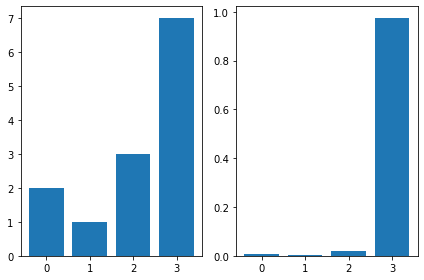

In [20]:
fig, ax = plt.subplots(1, 2)
ax[0].bar(range(4), arr)
ax[1].bar(range(4), sm_np)
plt.tight_layout()
plt.show()

In [23]:
x = torch.tensor([2., 1., 3., 7.])
torch.softmax(x, dim = 0)

tensor([0.0066, 0.0024, 0.0178, 0.9732])

In [30]:
def cross_entr_np(target, y_probs):
    N = arr.shape[0]
    
    return -np.sum(target * np.log(y_probs))/N

In [35]:
y = np.array([1., 0., 0.])
good_probs = np.array([0.8, 0.1, 0.1])
bad_probs = np.array([0.1, 0.5, 0.4])

print(f"loss for good_probs: {cross_entr_np(y, good_probs):.3f}")
print(f"loss for bad_probs:  {cross_entr_np(y, bad_probs):.3f}")

loss for good_probs: 0.056
loss for bad_probs:  0.576


**In torch** there is no One Hot Encoding

In [38]:
loss = nn.CrossEntropyLoss()

y = torch.tensor([0])

# n_samples*n_classes = 1*3
good_probs = torch.tensor([[0.8, 0.1, 0.1]])
bad_probs = torch.tensor([[0.1, 0.5, 0.4]])

print(f"loss for good_probs: {loss(good_probs, y).item():.3f}")
print(f"loss for bad_probs:  {loss(bad_probs, y).item():.3f}")

loss for good_probs: 0.690
loss for bad_probs:  1.346


In [40]:
loss = nn.CrossEntropyLoss()

y = torch.tensor([0, 2, 1])

# n_samples*n_classes = 3*3
good_probs = torch.tensor([[8., 1., 1.],
                           [0.05, 2.9, 0.05],
                           [0.2, 2.6, 0.2]])

bad_probs = torch.tensor([[0.1, 3.6, 1.3],
                          [1.8, 1.1, 0.1],
                          [1.5, 0.2, 1.3]])

print(f"loss for good_probs: {loss(good_probs, y).item():.3f}")
print(f"loss for bad_probs:  {loss(bad_probs, y).item():.3f}")

loss for good_probs: 1.043
loss for bad_probs:  2.626
